# Web Scraping using Python

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from urllib.request import urlopen
from bs4 import BeautifulSoup 
import re

In [193]:
url = "https://www.hubertiming.com/results/2023MLK"
html = urlopen(url)

In [194]:
soup = BeautifulSoup(html)

In [195]:
title = soup.title
print(title.text)

Race results for the 2023 MLK Dream Run!


In [196]:
links = soup.find_all('a', href=True)
for link in links:
    print(link['href'])

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2023MLK10K
/results/2023MLK15K
/results/summary/2023MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [197]:
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2023MLK10K
/results/2023MLK15K
/results/summary/2023MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [198]:
allrows  = soup.find_all("tr")
print(allrows[0])
print(allrows[1])
print(allrows[2])
print(allrows[2:10])

<tr colspan="2">
<b>5K:</b>
</tr>
<tr>
<td>Finishers:</td>
<td>311</td>
</tr>
<tr>
<td>Starters:</td>
<td>312</td>
</tr>
[<tr>
<td>Starters:</td>
<td>312</td>
</tr>, <tr>
<td>On Course:</td>
<td>1</td>
</tr>, <tr>
<td>Male:</td>
<td>130</td>
</tr>, <tr>
<td>Female:</td>
<td>161</td>
</tr>, <tr>
<td>Non-Binary:</td>
<td>21</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="360">
<td>1</td>
<td>360</td>
<td>

                    DEMETRIUS RHODES

                </td>
<td>M</td>
<td>29</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:44</td>
<td>17:47</td>
<td>

                    1 of 130

                </td>
<td>M 21-39</td>
<td>

                    1 of 61

                </td>
<td>0:01</td>
<td>17:48</td>
</tr>, <tr data-bib="390">
<td>2</td>
<td>39

In [199]:
for row in allrows:
    row_list = row.find_all("td")
print(row_list)
for cell in row_list:
    print(cell.text)

[<td></td>, <td>224</td>, <td>

                    ALYSSA HALBISEN

                </td>, <td>F</td>, <td>32</td>, <td>BOSTON</td>, <td>MA</td>, <td></td>, <td></td>, <td>
</td>, <td>F 21-39</td>, <td>

                    67 of 67

                </td>, <td>4:15</td>, <td></td>]

224


                    ALYSSA HALBISEN

                
F
32
BOSTON
MA




F 21-39


                    67 of 67

                
4:15



In [200]:
data = []
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
data = data[8:]
data[:10]

[['1',
  '360',
  '\r\n\r\n                    DEMETRIUS RHODES\r\n\r\n                ',
  'M',
  '29',
  'PORTLAND',
  'OR',
  '5:44',
  '17:47',
  '\r\n\r\n                    1 of 130\r\n\r\n                ',
  'M 21-39',
  '\r\n\r\n                    1 of 61\r\n\r\n                ',
  '0:01',
  '17:48'],
 ['2',
  '390',
  '\r\n\r\n                    ISAIAH SIMS\r\n\r\n                ',
  'M',
  '25',
  'GRESHAM',
  'OR',
  '5:46',
  '17:55',
  '\r\n\r\n                    2 of 130\r\n\r\n                ',
  'M 21-39',
  '\r\n\r\n                    2 of 61\r\n\r\n                ',
  '0:03',
  '17:58'],
 ['3',
  '241',
  '\r\n\r\n                    CARRE HEINECK\r\n\r\n                ',
  'F',
  '41',
  'PORTLAND',
  'OR',
  '5:50',
  '18:06',
  '\r\n\r\n                    1 of 160\r\n\r\n                ',
  'F 40-54',
  '\r\n\r\n                    1 of 51\r\n\r\n                ',
  '0:01',
  '18:07'],
 ['4',
  '351',
  '\r\n\r\n                    IRIS POWELL\r\n\r\n 

In [201]:
df = pd.DataFrame(data)

In [202]:
df[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,360,\r\n\r\n DEMETRIUS RHODES\r...,M,29,PORTLAND,OR,5:44,17:47,\r\n\r\n 1 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 61\r\n\r\n ...,0:01,17:48
1,2,390,\r\n\r\n ISAIAH SIMS\r\n\r\...,M,25,GRESHAM,OR,5:46,17:55,\r\n\r\n 2 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 61\r\n\r\n ...,0:03,17:58
2,3,241,\r\n\r\n CARRE HEINECK\r\n\...,F,41,PORTLAND,OR,5:50,18:06,\r\n\r\n 1 of 160\r\n\r\n ...,F 40-54,\r\n\r\n 1 of 51\r\n\r\n ...,0:01,18:07
3,4,351,\r\n\r\n IRIS POWELL\r\n\r\...,F,36,PORTLAND,OR,5:56,18:24,\r\n\r\n 2 of 160\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 67\r\n\r\n ...,0:02,18:26
4,5,323,\r\n\r\n MIKE MURAWSKI\r\n\...,M,46,PORTLAND,OR,5:57,18:30,\r\n\r\n 3 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 35\r\n\r\n ...,0:05,18:35
5,6,135,\r\n\r\n DAVID BROOKS\r\n\r...,M,54,LAKE OSWEGO,OR,5:58,18:31,\r\n\r\n 4 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 35\r\n\r\n ...,0:06,18:37
6,7,208,\r\n\r\n GREGORY GERSTNER\r...,M,48,PORTLAND,OR,6:02,18:45,\r\n\r\n 5 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 3 of 35\r\n\r\n ...,0:02,18:47
7,8,378,\r\n\r\n MATTHEW SCHAFER\r\...,M,32,PORTLAND,OR,6:05,18:54,\r\n\r\n 6 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 61\r\n\r\n ...,0:02,18:56
8,9,298,\r\n\r\n SUPREETH MANNAVA\r...,M,30,PORTLAND,OR,6:15,19:26,\r\n\r\n 7 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 4 of 61\r\n\r\n ...,0:02,19:28
9,10,358,\r\n\r\n COLIN REINHARDT\r\...,M,53,PORTLAND,OR,6:54,21:27,\r\n\r\n 8 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 4 of 35\r\n\r\n ...,0:29,21:56


In [203]:
header_list = []
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
header_list

['Place',
 'Bib',
 'Name',
 'Gender',
 'Age',
 'City',
 'State',
 'Chip Pace',
 'Time',
 'Gender Place',
 'Age Group',
 'Age Group Place',
 'Time to Start',
 'Gun Time']

In [204]:
df.columns  = header_list

In [205]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,360,\r\n\r\n DEMETRIUS RHODES\r...,M,29,PORTLAND,OR,5:44,17:47,\r\n\r\n 1 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 61\r\n\r\n ...,0:01,17:48
1,2,390,\r\n\r\n ISAIAH SIMS\r\n\r\...,M,25,GRESHAM,OR,5:46,17:55,\r\n\r\n 2 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 61\r\n\r\n ...,0:03,17:58
2,3,241,\r\n\r\n CARRE HEINECK\r\n\...,F,41,PORTLAND,OR,5:50,18:06,\r\n\r\n 1 of 160\r\n\r\n ...,F 40-54,\r\n\r\n 1 of 51\r\n\r\n ...,0:01,18:07
3,4,351,\r\n\r\n IRIS POWELL\r\n\r\...,F,36,PORTLAND,OR,5:56,18:24,\r\n\r\n 2 of 160\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 67\r\n\r\n ...,0:02,18:26
4,5,323,\r\n\r\n MIKE MURAWSKI\r\n\...,M,46,PORTLAND,OR,5:57,18:30,\r\n\r\n 3 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 35\r\n\r\n ...,0:05,18:35


In [206]:
df['Name'] = df['Name'].apply(lambda x: x.replace('\r\n\r\n                   ', '').replace('\r\n\r\n                ', ''))

In [207]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,360,DEMETRIUS RHODES,M,29,PORTLAND,OR,5:44,17:47,\r\n\r\n 1 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 61\r\n\r\n ...,0:01,17:48
1,2,390,ISAIAH SIMS,M,25,GRESHAM,OR,5:46,17:55,\r\n\r\n 2 of 130\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 61\r\n\r\n ...,0:03,17:58
2,3,241,CARRE HEINECK,F,41,PORTLAND,OR,5:50,18:06,\r\n\r\n 1 of 160\r\n\r\n ...,F 40-54,\r\n\r\n 1 of 51\r\n\r\n ...,0:01,18:07
3,4,351,IRIS POWELL,F,36,PORTLAND,OR,5:56,18:24,\r\n\r\n 2 of 160\r\n\r\n ...,F 21-39,\r\n\r\n 1 of 67\r\n\r\n ...,0:02,18:26
4,5,323,MIKE MURAWSKI,M,46,PORTLAND,OR,5:57,18:30,\r\n\r\n 3 of 130\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 35\r\n\r\n ...,0:05,18:35


In [208]:
df['Gender Place'] = df['Gender Place'].apply(lambda x: x.replace('\r\n\r\n                   ', '').replace('\r\n\r\n                ', ''))

In [209]:
df['Age Group Place'] = df['Age Group Place'].apply(lambda x: x.replace('\r\n\r\n                   ', '').replace('\r\n\r\n                ', ''))

In [210]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,360,DEMETRIUS RHODES,M,29,PORTLAND,OR,5:44,17:47,1 of 130,M 21-39,1 of 61,0:01,17:48
1,2,390,ISAIAH SIMS,M,25,GRESHAM,OR,5:46,17:55,2 of 130,M 21-39,2 of 61,0:03,17:58
2,3,241,CARRE HEINECK,F,41,PORTLAND,OR,5:50,18:06,1 of 160,F 40-54,1 of 51,0:01,18:07
3,4,351,IRIS POWELL,F,36,PORTLAND,OR,5:56,18:24,2 of 160,F 21-39,1 of 67,0:02,18:26
4,5,323,MIKE MURAWSKI,M,46,PORTLAND,OR,5:57,18:30,3 of 130,M 40-54,1 of 35,0:05,18:35


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            312 non-null    object
 1   Bib              312 non-null    object
 2   Name             312 non-null    object
 3   Gender           312 non-null    object
 4   Age              312 non-null    object
 5   City             312 non-null    object
 6   State            312 non-null    object
 7   Chip Pace        312 non-null    object
 8   Time             312 non-null    object
 9   Gender Place     312 non-null    object
 10  Age Group        312 non-null    object
 11  Age Group Place  312 non-null    object
 12  Time to Start    312 non-null    object
 13  Gun Time         312 non-null    object
dtypes: object(14)
memory usage: 34.2+ KB


In [212]:
df.shape

(312, 14)

In [221]:
df2 = df.dropna(axis=0, how='any')
df2.shape

(312, 14)

In [222]:
df2['Time'][299:]

299      58:51
300    1:00:02
301    1:00:04
302    1:00:04
303    1:00:32
304    1:00:32
305    1:01:05
306    1:01:40
307    1:09:49
308    1:09:50
309    1:09:53
310    1:18:09
311           
Name: Time, dtype: object

In [223]:
df2['Time'][:300] = '00:' + df2['Time'][:300].astype(str)

/tmp/ipykernel_33/1054011935.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Time'][:300] = '00:' + df2['Time'][:300].astype(str)


In [224]:
df2['Time'][300:] = '0' + df2['Time'][300:].astype(str)

/tmp/ipykernel_33/3575503194.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Time'][300:] = '0' + df2['Time'][300:].astype(str)


In [225]:
df2.tail()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
307,308,179,THUAN DUONG,F,50,PORTLAND,OR,22:31,01:09:49,157 of 160,F 40-54,48 of 51,0:39,1:10:28
308,309,414,GWEN THOMPSON,F,53,PORTLAND,OR,22:31,01:09:50,158 of 160,F 40-54,49 of 51,0:39,1:10:29
309,310,385,CHEYENNE SHEEHAN,F,53,PORTLAND,OR,22:32,01:09:53,159 of 160,F 40-54,50 of 51,0:35,1:10:28
310,311,107,BARBARA ALEXANDER,F,53,PORTLAND,OR,25:12,01:18:09,160 of 160,F 40-54,51 of 51,0:00,1:18:09
311,,224,ALYSSA HALBISEN,F,32,BOSTON,MA,,0,\n,F 21-39,67 of 67,4:15,


In [226]:
df2.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,360,DEMETRIUS RHODES,M,29,PORTLAND,OR,5:44,00:17:47,1 of 130,M 21-39,1 of 61,0:01,17:48
1,2,390,ISAIAH SIMS,M,25,GRESHAM,OR,5:46,00:17:55,2 of 130,M 21-39,2 of 61,0:03,17:58
2,3,241,CARRE HEINECK,F,41,PORTLAND,OR,5:50,00:18:06,1 of 160,F 40-54,1 of 51,0:01,18:07
3,4,351,IRIS POWELL,F,36,PORTLAND,OR,5:56,00:18:24,2 of 160,F 21-39,1 of 67,0:02,18:26
4,5,323,MIKE MURAWSKI,M,46,PORTLAND,OR,5:57,00:18:30,3 of 130,M 40-54,1 of 35,0:05,18:35


In [227]:
df2['ChipTime_minutes'] = pd.to_timedelta(df2['Time']).dt.total_seconds() / 60
print(df2['ChipTime_minutes'])

0      17.783333
1      17.916667
2      18.100000
3      18.400000
4      18.500000
         ...    
307    69.816667
308    69.833333
309    69.883333
310    78.150000
311     0.000000
Name: ChipTime_minutes, Length: 312, dtype: float64


Text(0.5, 1.0, 'Comparision of average minutes run by Male and Female')

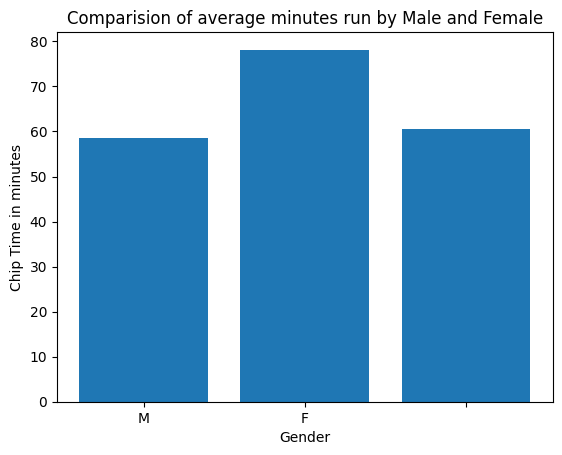

In [228]:
plt.bar(df2['Gender'], df2['ChipTime_minutes'])
plt.xlabel('Gender')
plt.ylabel('Chip Time in minutes')
plt.title('Comparision of average minutes run by Male and Female')

In [230]:
df2.describe(include=[np.number])

,ChipTime_minutes
count,312.000000
mean,36.058868
std,11.917181
min,0.000000
25%,27.983333
50%,32.958333
75%,42.091667
max,78.150000


Text(0, 0.5, 'Run time')

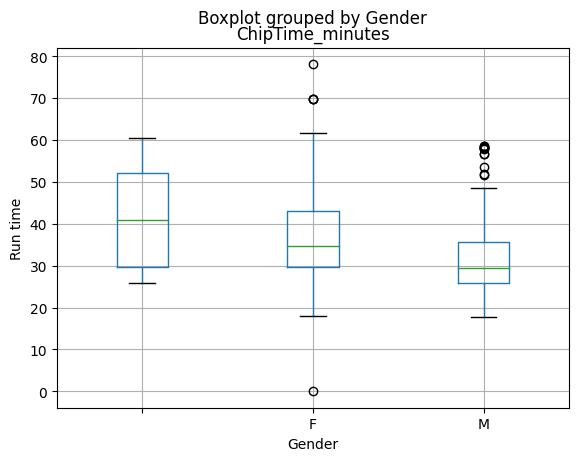

In [232]:
df2.boxplot(column='ChipTime_minutes', by='Gender')
plt.ylabel('Run time')

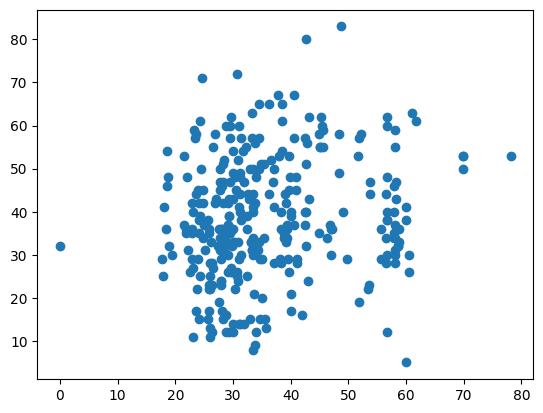

In [235]:
#Age vs Chip time in minutes
df2['Age_i'] = round(pd.to_numeric(df2['Age'], errors = 'coerce'))
df2.dropna(how='any', inplace=True)

plt.scatter(df2['ChipTime_minutes'], df2['Age_i'])
plt.show()